In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [3]:
# X = pd.read_csv('./Training Data/Linear_X_Train.csv').values
# y = pd.read_csv('./Training Data/Linear_Y_Train.csv').values.reshape(-1)
# print(X.shape,y.shape)

In [166]:
X,y = make_regression(n_samples=10000,n_features=1,n_informative=1,n_targets=1,noise=10,bias = 0,random_state=42)

In [167]:
print(X.shape,y.shape)

(10000, 1) (10000,)


In [168]:
def yploy(X):
    return 4*X**2 - 2*X + 3

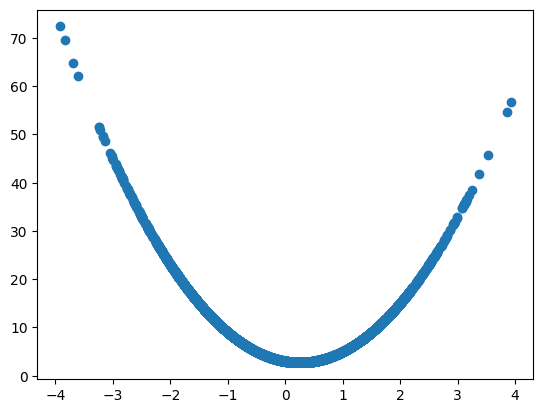

In [172]:
yp = yploy(X).reshape(-1)
plt.scatter(X,yp)
plt.show()

In [173]:
yp.shape

(10000,)

In [121]:
def hypothesis(x,w,w0):

    # for i in range(x.shape[0]):
    #     # y = 0
    #     # for j in range(x.shape[1]):
    #     #     y += w[j]*x[i,j]

    #     y = np.sum(w*x[i]) + w0

    #     # y += w0
        
    #     print(y)

     # return np.sum(w*x,axis = 1) + w0
    return w@x.T+w0

In [122]:
# hypothesis(X,[1],1)
hypothesis(np.array([[1,2],[2,3],[3,4],[4,5]]),[2,1],0)

array([ 4,  7, 10, 13])

In [123]:
w = [2]
w0 = 1

In [124]:
def loss(x,w,w0,y):
    ypred = hypothesis(x,w,w0)
    return np.mean((ypred-y)**2)

In [125]:
loss(X,w,w0,y)

935.3144608405288

In [126]:
def gradientDescent(X,y,lr = 0.01,epochs = 100):
    w = np.zeros(shape=(X.shape[1],))
    w0 = 1
    for e in range(epochs):
        ypred = hypothesis(X,w,w0)

        # grad = []
        # for j in range(X.shape[1]):
        #     g = 0
        #     for i in range(X.shape[0]):
        #         g += (ypred[i] - y[i])*X[i,j]
        #     g /= X.shape[0]
        #     grad.append(g)

        # grad = []
        # for j in range(X.shape[1]):
        #     grad.append(np.mean((ypred - y)*X[:,j]))

        grad = ((ypred-y)@X)/X.shape[0]

        w = w - lr*np.array(grad)
        w0 = w0 - lr*np.mean((ypred-y))
        
    return w,w0

In [127]:
w,w0 = gradientDescent(X,y,lr = 0.05,epochs=10000)

In [128]:
w

array([32.07131819])

In [129]:
w0

5.039373199731539

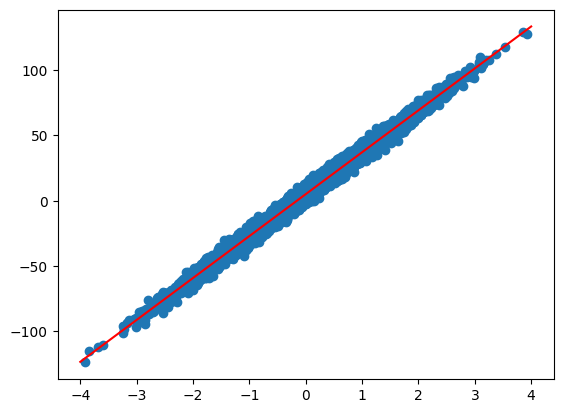

In [130]:
x = np.linspace(-4,4,1000).reshape((-1,1))
plt.scatter(X,y)
plt.plot(x,hypothesis(x,w,w0),c='r')
plt.show()

In [174]:
class LinearRegression:
    def __init__(self,lr = 0.01):
        self.lr = lr
    def fit(self,X,y,epochs = 100):
        self.w, self.w0 = self.gradientDescent(X,y,self.lr,epochs)

    def hypothesis(self,x,w,w0):
        return w.dot(x.T) + w0

    def loss(self,x,w,w0,y):
        ypred = self.hypothesis(x,w,w0)
        return np.mean((ypred-y)**2)

    def predict(self,X):
        return self.hypothesis(X,self.w,self.w0)

    def gradientDescent(self,X,y,lr = 0.01,epochs = 100):
        w = np.zeros(shape=(X.shape[1],))
        w[0] = -10
        w0 = 0
        clf.th1 = [w[0]]
        clf.th0 = [w0]
        self.loss_e = [self.loss(X,w,w0,y)]
        for e in range(epochs):
            ypred = self.hypothesis(X,w,w0)
            i = np.random.randint(X.shape[0])
            # grads = np.mean((ypred-y)*X.T,axis =1)

            grads = (ypred[i]-y[i])*X[i]
            w = w - lr*grads
            w0 = w0 - lr*np.mean(ypred-y)

            clf.th1.append(w[0])
            clf.th0.append(w0)
            
            self.loss_e.append(self.loss(X,w,w0,y))
            
        return w,w0

In [181]:
Xp = np.hstack([X,X**2])

In [182]:
clf = LinearRegression(lr = 0.1)

In [183]:
clf.fit(Xp,yp,epochs=200)

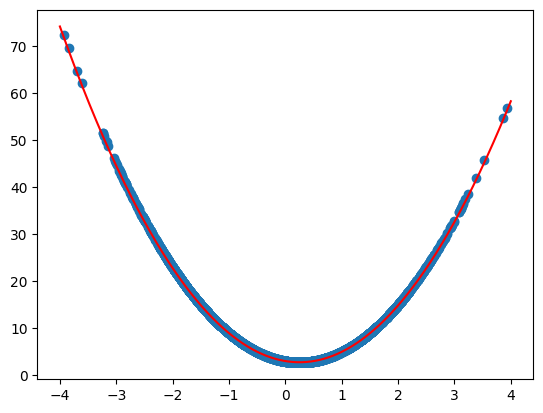

In [184]:
x = np.linspace(-4,4,1000).reshape((-1,1))
xp = np.hstack([x,x**2])
plt.scatter(X,yp)
plt.plot(x,clf.predict(xp),c='r')
plt.show()

In [185]:
clf.w

array([-1.9856094 ,  3.94809038])

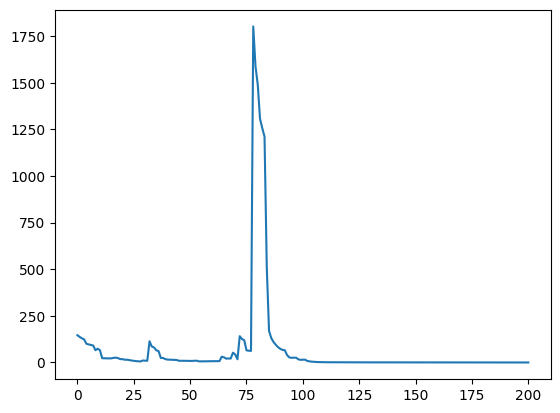

In [186]:
plt.plot(clf.loss_e)
# plt.xlim(0,100)
plt.show()

In [142]:
r2_score(y,clf.predict(X))

0.9905804977764467

In [143]:
clf.w

array([32.95894214])

In [144]:
clf.w0

5.040311670348391

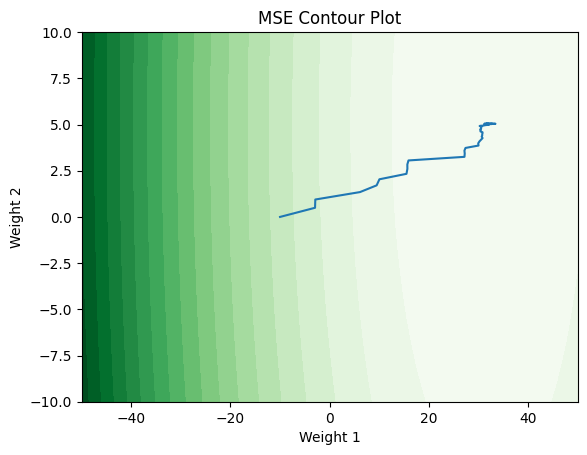

In [151]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Assume you have your data (X, y) and a trained linear regression model with weights 'w1' and 'w2' 
Xs = np.column_stack((X,np.ones_like(X)))
# Generate a grid of possible weights
w1_range = np.linspace(-50, 50, 50)
w2_range = np.linspace(-10, 10, 50)
w1_grid, w2_grid = np.meshgrid(w1_range, w2_range)

# Calculate MSE for each weight combination
mse_grid = np.zeros_like(w1_grid)
for i in range(len(w1_range)):
    for j in range(len(w2_range)):
        w1_test, w2_test = w1_grid[i, j], w2_grid[i, j]
        predicted = np.dot(Xs, [w1_test, w2_test])
        mse_grid[i, j] = mean_squared_error(y, predicted) 

# Create contour plot
plt.contourf(w1_grid, w2_grid, mse_grid, levels=20,cmap = 'Greens')
plt.plot(clf.th1,clf.th0)

plt.xlabel("Weight 1")
plt.ylabel("Weight 2")
plt.title("MSE Contour Plot")
plt.show()

In [108]:
clf.th1

[0.0,
 0.21143467330711424,
 0.4207549939225528,
 0.6279821054869518,
 0.8331369402028624,
 1.0362402209491535,
 1.237312463374271,
 1.4363739779685631,
 1.6334448721158834,
 1.8285450521246758,
 2.021694225238751,
 2.2129119016279515,
 2.402217396358914,
 2.5896298313461195,
 2.775168137283436,
 2.958851055556343,
 3.140697140135036,
 3.320724759448597,
 3.4989520982404265,
 3.6753971594051174,
 3.850077765806961,
 4.02301156208027,
 4.194216016411695,
 4.363708422304719,
 4.531505900326507,
 4.6976253998372846,
 4.862083700702428,
 5.024897414987425,
 5.186082988635896,
 5.345656703130822,
 5.503634677139174,
 5.660032868140085,
 5.814867074036746,
 5.968152934752179,
 6.119905933809055,
 6.270141399893716,
 6.418874508404549,
 6.5661202829848815,
 6.711893597040547,
 6.856209175242274,
 6.999081595013053,
 7.140525288000627,
 7.280554541535257,
 7.4191835000729105,
 7.5564261666240204,
 7.6922964041679505,
 7.826807937053322,
 7.959974352384331,
 8.091809101393212,
 8.22232550079896

In [152]:
X = np.hstack([np.ones((X.shape[0],1)),X])

In [153]:
X

array([[ 1.        , -0.71657349],
       [ 1.        , -0.84144951],
       [ 1.        , -0.27667177],
       ...,
       [ 1.        ,  1.04839989],
       [ 1.        , -1.12863451],
       [ 1.        , -2.04994128]])

In [154]:
w = np.linalg.inv(X.T@X)@X.T@y

In [155]:
w

array([ 5.0393732 , 32.07131819])

In [54]:
scale = StandardScaler()
X = scale.fit_transform(X)

In [55]:
clf = LinearRegression()
clf.fit(X,y)

LinearRegression()

In [56]:
clf.coef_

array([ 0.        , 79.90573694])

In [57]:
clf.intercept_

0.6838689680155964